In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Seed for clean reproducibility
np.random.seed(42)

# Simulate sales data
n_records = 5000

dates = pd.date_range(start='2025-01-01', periods=n_records, freq='H')

data = pd.DataFrame({
    'timestamp': dates,
    'total_revenue': np.round(np.random.uniform(50, 500, n_records), 2),
    'transactions': np.random.randint(1, 10, n_records),
    'average_check': lambda df: np.round(df.total_revenue/df.transactions, 2),
    'item_sold': np.random.choice(
        ['Pulled Pork', 'Beef Ribs', 'Brisket', 'BBQ Chicken', 'Veg Skewer'], n_records
    ),
    'ingredient_cost': np.round(np.random.uniform(5, 40, n_records), 2),
    'seat_capacity': np.random.choice([20, 30, 40], n_records),
    'employee_hours': np.random.randint(1, 8, n_records),
})

data['food_cost_pct'] = np.round((data.ingredient_cost / data.total_revenue)*100, 2)
data['profit_margin'] = np.round((data.total_revenue - data.ingredient_cost) / data.total_revenue * 100, 2)
data['hour'] = data['timestamp'].dt.hour
data.head()

/var/folders/88/w4w1n8l12kd_z42_6mrnndmw0000gn/T/ipykernel_80490/397403457.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start='2025-01-01', periods=n_records, freq='H')


,timestamp,total_revenue,transactions,average_check,item_sold,ingredient_cost,seat_capacity,employee_hours,food_cost_pct,profit_margin,hour
0,2025-01-01 00:00:00,218.54,3,<function <lambda> at 0x10644fc40>,Veg Skewer,39.44,20,7,18.05,81.95,0
1,2025-01-01 01:00:00,477.82,8,<function <lambda> at 0x10644fc40>,Veg Skewer,11.55,40,1,2.42,97.58,1
2,2025-01-01 02:00:00,379.40,7,<function <lambda> at 0x10644fc40>,BBQ Chicken,35.27,30,5,9.30,90.70,2
3,2025-01-01 03:00:00,319.40,3,<function <lambda> at 0x10644fc40>,Brisket,18.66,40,1,5.84,94.16,3
4,2025-01-01 04:00:00,120.21,6,<function <lambda> at 0x10644fc40>,Veg Skewer,18.35,40,4,15.26,84.74,4


In [4]:
sales_summary = pd.DataFrame({
    'Total_Revenue': [data['total_revenue'].sum()],
    'Total_Transactions': [data['transactions'].sum()],
})

sales_summary['Avg_Check_Size'] = (
    sales_summary['Total_Revenue'] /
    sales_summary['Total_Transactions']
)

sales_summary

,Total_Revenue,Total_Transactions,Avg_Check_Size
0,1367871.8,25036,54.636196


In [5]:
menu_sales = data.groupby('item_sold')['transactions'].sum().sort_values(ascending=False)
menu_sales

item_sold
Beef Ribs      5253
BBQ Chicken    5027
Pulled Pork    4964
Veg Skewer     4945
Brisket        4847
Name: transactions, dtype: int64

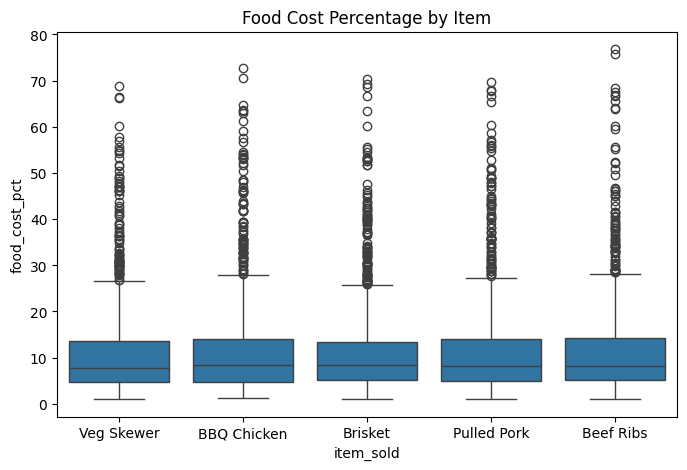

In [6]:
plt.figure(figsize=(8,5))
sns.boxplot(x='item_sold', y='food_cost_pct', data=data)
plt.title('Food Cost Percentage by Item')
plt.show()

In [7]:
data['revpash'] = data.total_revenue / data.seat_capacity
data['revpash'].head()

0    10.927000
1    11.945500
2    12.646667
3     7.985000
4     3.005250
Name: revpash, dtype: float64

In [8]:
labor_summary = data.groupby('employee_hours').agg({
    'total_revenue': 'sum',
    'transactions': 'count'
})
labor_summary

,total_revenue,transactions
employee_hours,,
1,189072.92,704
2,192745.16,697
3,201993.40,746
4,182775.11,670
5,213305.55,779
6,190010.41,686
7,197969.25,718


Text(0.5, 1.0, 'Waste Indicator Distribution')

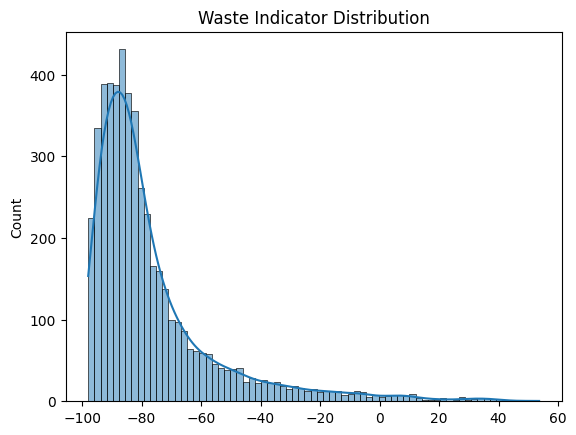

In [9]:
waste_signal = data['food_cost_pct'] - data['profit_margin']
sns.histplot(waste_signal, kde=True).set_title('Waste Indicator Distribution')

In [10]:
peak_hours = data.groupby('hour')['total_revenue'].sum().sort_values(ascending=False).head(3)
peak_hours

hour
13    60079.63
8     59647.12
9     59519.68
Name: total_revenue, dtype: float64

In [12]:
marketing_data = pd.DataFrame({
    'channel': ['Social', 'Local Radio','Flyers','Online Ads'],
    'spend': [800, 500, 250, 1200],
    'generated_revenue': [4000, 2200, 600, 6100]
})
marketing_data['roi'] = (marketing_data.generated_revenue - marketing_data.spend) / marketing_data.spend * 100
marketing_data

,channel,spend,generated_revenue,roi
0,Social,800,4000,400.000000
1,Local Radio,500,2200,340.000000
2,Flyers,250,600,140.000000
3,Online Ads,1200,6100,408.333333
